# Convert reco locations to RA and Dec

### Apr 29, 2021

## Code

In [35]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re
import corner


In [36]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


# Get data

In [37]:
# file_list=[]#Define an empty list
# for filename in os.listdir("/fs/project/PAS0654/ARA_DATA/A23/sim_SourceSearch/A2/Joined"):#Loop over desired directory
#     if filename.endswith(".root"): #extension, .root in this case
#         file_list.append(os.path.join("/fs/project/PAS0654/ARA_DATA/A23/sim_SourceSearch/A2/Joined", str(filename))) #add file name to the list

# chain = TChain("OutputTree_recoRadius_19") #Define chain and tree that needs to be read. "RecoVals" in this case.
# for line in file_list:
#     chain.AddFile(line)
    
# phi = []
# theta = []
# phi_h = []
# theta_h = []
# viewAnglAvg = []
# corr_value = []
# weights = []
# for entry in chain:
# #     if(entry.peakCorr_single[0]<0.01): continue
# #     if(entry.peakPhi_single[0]<0):
# #         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
# #     else:
#     phi.append(entry.peakPhi_single[0]) 
# #     phi_h.append(entry.peakPhi_single[1]) 
#     theta.append(entry.peakTheta_single[0])
# #     theta_h.append(entry.peakTheta_single[1])
# #     viewAnglAvg.append(entry.viewAngleAvg[0])
#     corr_value.append(entry.peakCorr_single[0])
#     weights.append(entry.weight)

In [38]:
recoLoc = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/sim_util/InterfRecoCenA.pkl")

recoLoc = recoLoc.loc[recoLoc.theta<37]

phi = np.array(recoLoc.phi)
theta = np.array(recoLoc.theta)
weights = np.array(recoLoc.weights)

# Look at distributions

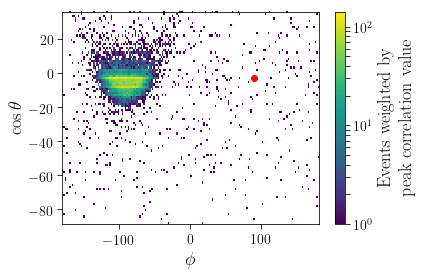

In [52]:
plt.hist2d(phi,np.array(theta), bins=[180,100], weights=weights,norm=colors.LogNorm());
plt.colorbar(label="Events weighted by \n peak correlation value")
plt.scatter(np.degrees(1.571),180-np.degrees(2.32)-50, color="red")
plt.xlabel("$\phi$")
plt.ylabel("$\cos\\theta$")
# plt.title("Reco peak angles (300m hypothesis)")
plt.tight_layout()
# plt.xlim(-150,0)
# plt.ylim(20,80)

(-150, 0)

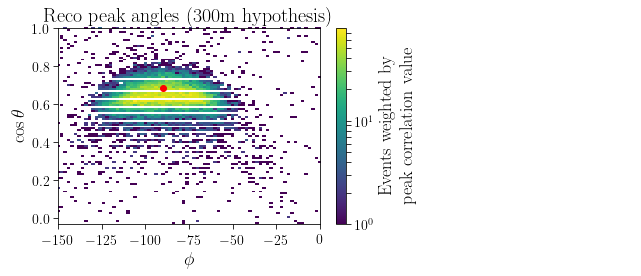

In [49]:
plt.hist2d(phi,np.cos(np.radians(np.array(theta)+56)), bins=[180,100], weights=weights,norm=colors.LogNorm());
plt.colorbar(label="Events weighted by \n peak correlation value")
plt.scatter(np.degrees(1.571)-180,np.cos(np.radians(180-np.degrees(2.32))), color="red")
plt.xlabel("$\phi$")
plt.ylabel("$\cos\\theta$")
plt.title("Reco peak angles (300m hypothesis)")
plt.tight_layout()
plt.xlim(-150,0)
# plt.ylim(20,80)

In [50]:
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm


### Projection

In [51]:
x=np.radians(phi)
y=np.array(np.radians(theta))
# y = theta
xy = np.vstack([x,y])
kernel = gaussian_kde(xy, bw_method='silverman', weights=weights)

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

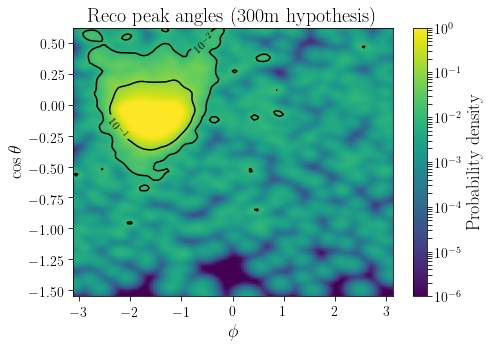

In [52]:
plt.figure(figsize=(7,5))
from matplotlib import ticker, cm

levels = [1e-2,1e-1]

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=1))
# plt.scatter(np.degrees(1.571)-180,np.cos(np.radians(180-np.degrees(2.32))), color="red")
plt.title("Reco peak angles (300m hypothesis)")

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# plt.title("Hpol")
plt.xlabel("$\phi$")
plt.ylabel("$\cos\\theta$")
plt.tight_layout()
# plt.savefig("KDE_CenA_recoPeak_300m_Vpol.pdf")

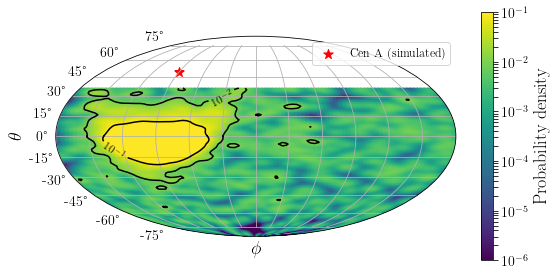

In [61]:
from matplotlib.ticker import NullFormatter

fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(111, projection='mollweide')

contours = ax.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
ax.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=1e-1))
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# ax.axhline(np.radians(38), label = "Surface", color = "white", ls = '--')
ax.xaxis.set_major_formatter(NullFormatter())
plt.grid()
ax.scatter(-1.571,2.32, marker = "*", color="red", label = "Cen A (simulated)", s = 100)
ax.legend()
ax.set_xlabel("$\phi$")
ax.set_ylabel("$\\theta$")

plt.tight_layout()
plt.savefig("./Mollview_CenA_Sim_recoKDE.pdf")

## Use astropy to convert to RA and Dec given unixTime

In [5]:
from astropy.visualization import astropy_mpl_style, quantity_support #astropy utilities
# plt.style.use(astropy_mpl_style)
quantity_support()

import astropy.units as u #astropy's units module
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import datetime

In [6]:
south_pole = EarthLocation(lat=-90.0*u.deg, lon=-109.83*u.deg, height=-179.93*u.m)
utcoffset = -0*u.hour  # No UTC offset, as the South Pole uses UTC
time = Time(1466155736, format="unix") - utcoffset


## Get data

In [28]:
bkgFolder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/data_util/"

In [98]:
combined =[]
for config in range(1,6):
#     print(config)
    bkg = pd.read_pickle(bkgFolder+"bkgDistribution_%i.pkl"%config)
    combined.append(bkg)
    
allBkg = pd.concat(combined)
# allBkg = allBkg.tail(5000)

In [99]:
time = Time(allBkg.unixTime, format="unix") - utcoffset
convert = AltAz(az = np.radians(np.array(allBkg.phi))*u.rad, alt = np.radians(np.array(allBkg.theta))*u.rad,location=south_pole,obstime=time)

In [100]:
a = SkyCoord(alt = convert.alt, az = convert.az,frame = "altaz", location=south_pole,obstime=time)

In [101]:
# ra = np.radians(np.array(a.icrs.ra/u.deg))
# dec = np.radians(np.array(a.icrs.dec/u.deg))
ra_rad = a.icrs.ra.wrap_at(180 * u.deg).radian
dec_rad = a.icrs.dec.radian

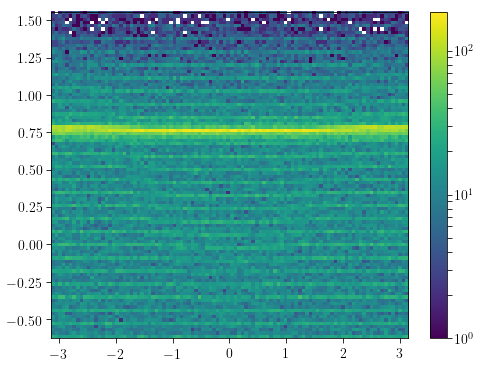

In [102]:
fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection="mollweide")
plt.hist2d(ra_rad, (dec_rad), bins = 100, norm = mpl.colors.LogNorm());
plt.colorbar()

In [103]:
import healpy as hp

In [104]:
def cat2hpx(phi, theta, nside, radec=True):
    """
    Convert a catalogue to a HEALPix map of number counts per resolution
    element.

    Parameters
    ----------
    lon, lat : (ndarray, ndarray)
        Coordinates of the sources in degree. If radec=True, assume input is in the icrs
        coordinate system. Otherwise assume input is glon, glat

    nside : int
        HEALPix nside of the target map

    radec : bool
        Switch between R.A./Dec and glon/glat as input coordinate system.

    Return
    ------
    hpx_map : ndarray
        HEALPix map of the catalogue number counts in Galactic coordinates

    """

    npix = hp.nside2npix(nside)

#     if radec:
#         eq = SkyCoord(lon, lat, 'icrs', unit='deg')
#         l, b = eq.galactic.l.value, eq.galactic.b.value
#     else:
#         l, b = lon, lat

    # conver to theta, phi
#     theta = np.radians(90. - b)
#     phi = np.radians(l)

    # convert to HEALPix indices
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)

    # fill the fullsky map
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[idx] = counts

    return hpx_map

In [105]:
hpx_map = cat2hpx(ra_rad, np.pi/2-dec_rad, 50)


In [106]:
decCenA = np.radians(float(a.icrs.dec[0]/u.deg))

In [97]:
decCenA

-0.7508251573779829

In [91]:
a.icrs.wrap_to

AttributeError: 'SkyCoord' object has no attribute 'wrap_to'

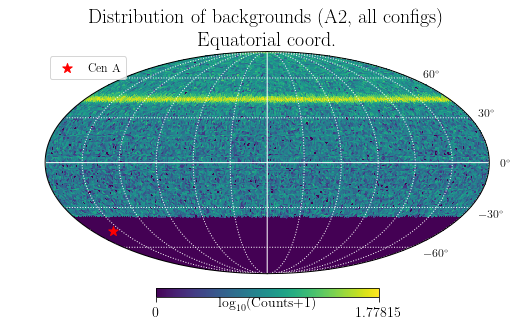

In [107]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
plt.sca(ax)
title = r'sky sca'
themap = hp.mollview(np.log10(hpx_map+1),hold=True, title=title,unit=r'$\log_{10}$(Counts+1)',notext=True )
hp.projscatter(-0.7508+np.pi,np.radians(360-201.36506288), color='red',s = 100, marker='*', label='Cen A')

hp.graticule(color = "white",verbose=True)
ax.tick_params(direction='out', length=6, width=2, colors='r')
plt.title("Distribution of backgrounds (A2, all configs)\n Equatorial coord.")
#Add tick labels
plt.text(2.1,0., r"$0^\circ$", ha="left", va="center")
plt.text(1.9,0.45, r"$30^\circ$", ha="left", va="center")
plt.text(1.4,0.8, r"$60^\circ$", ha="left", va="center")
plt.text(1.9,-0.45, r"$-30^\circ$", ha="left", va="center")
plt.text(1.4,-0.8, r"$-60^\circ$", ha="left", va="center")
plt.legend(loc = "upper left")

## Cross check with Cen A

### Convert to AltAz

In [45]:
CenA = SkyCoord.from_name('Cen A')

south_pole = EarthLocation(lat=-89.97*u.deg, lon=-109.83*u.deg, height=-179.93*u.m)
utcoffset = -0*u.hour  # No UTC offset, as the South Pole uses UTC
time = Time(allBkg.unixTime, format="unix") - utcoffset

CenAaltaz = CenA.transform_to(AltAz(obstime=time,location=south_pole))

In [46]:
CenA.icrs.ra,CenA.icrs.dec

(<Longitude 201.36506288 deg>, <Latitude -43.01911267 deg>)

In [47]:
alt = np.array(CenAaltaz.alt/u.deg)
az = np.array(CenAaltaz.az/u.deg)

### Convert back to Dec and RA

In [48]:
convert = AltAz(az = np.radians(az)*u.rad, alt = np.radians(alt)*u.rad,location=south_pole,obstime=time)

In [49]:
a = SkyCoord(alt = convert.alt, az = convert.az,frame = "altaz", location=south_pole,obstime=time)

In [50]:
a.icrs.ra[0], a.icrs.dec[0]

(<Longitude 201.36506288 deg>, <Latitude -43.01911267 deg>)

#### Yep, it works!

## Function to convert reco'ed locations to RA and Dec

In [25]:
def convertToARACoord(phi_AstroPy):
    """
    Returns the azimuth in ARA's coord system from an AltAz coord. syst. like Astropy's
    
    Parameters
    ----------
    phi_AstroPy : float
        Azimuth in AltAz [radians]
    Returns
    -------
    phi_ARA : float
        Azimuth in ARA's coord system [radians]
    """    
    phi_CCW = np.mod(np.pi/2-phi_AstroPy,2*np.pi) # Convert from CW coord. system to CCW
    phi_ARA = np.mod((phi_CCW+np.pi),2*np.pi)-np.pi/2#+np.pi/2 #Convert from [0,360] to [-180,180]+ 90 deg out of phase with the ISO 6709
    return phi_ARA
    
def ConvertARAtoAltAz(phi_ARA):
    """
    Returns the azimuth in AltAz (Astropy's) coord system from ARA's coord. syst. The inverse function to convertToARACoord

    Parameters
    ----------
    phi_ARA : float
        Azimuth in ARA's coord. syst. [radians]
    Returns
    -------
    Az : float
        Azimuth in AltAz coord system [radians]
    """    
    a = np.mod(phi_ARA-np.pi, 2*np.pi)+np.pi
    az = np.mod(-a+np.pi/2,2*np.pi)+np.pi/2
    return az

def convertARAtoRaDec(station, phi_ARA, theta_ARA, unixTime):
    """
    Returns the RA and Dec (Astropy's) for an azimuth and zenith given in ARA's coord. system.

    Parameters
    ----------
    station : int
        ARA station. Works for TB (0), A2(2), A3(3)
    phi_ARA : float
        Azimuth in ARA's coord. syst. [radians]
    theta_ARA : float
        Zenith in ARA's coord. syst. [radians]
    unixTime : int
        Time Stamp in seconds
    Returns
    -------
    RA, Dec : array_like [radians]
        Azimuth in AltAz coord system [radians]
    """    
    #Define obs point
    stationLon = 0
    stationHeight = 0
    
    if(station == 0):
        stationLon = -74.44
        stationHeight = -30
    elif(station == 2):
        stationLon = -109.83
        stationHeight = -179.93 #Mean height of antennas
    elif(station == 3):
        stationLon = -88.17
        stationHeight = -181.66 #Mean height of antennas   
    
    south_pole = EarthLocation(lat=-89.97*u.deg, lon=stationLon*u.deg, height=stationHeight*u.m)#Assuming all stations are at the same Lat
    utcoffset = -0*u.hour  # No UTC offset, as the South Pole uses UTC
    time = Time(unixTime, format="unix") - utcoffset
    
    #First, we need to convert from ARA's coordinate system to AltAz
    Alt = theta_ARA
    Az = ConvertARAtoAltAz(phi_ARA)
    
    #Define Astropy AltAz frame
    convert = AltAz(az = Az*u.rad, alt = Alt*u.rad, location=south_pole,obstime=time)
    #Define SkyCoord frame
    sky = SkyCoord(alt = convert.alt, az = convert.az,frame = "altaz", location=south_pole,obstime=time)
    RA = (sky.icrs.ra/u.deg)
    Dec = (sky.icrs.dec/u.deg)
    return [RA, Dec]


In [26]:
altARA = np.radians(np.array(CenAaltaz.zen/u.deg))
azARA = np.array(convertToARACoord(np.radians(np.array(CenAaltaz.az/u.deg))))

NameError: name 'CenAaltaz' is not defined

In [27]:
convertARAtoRaDec(2, azARA, altARA, allBkg.unixTime)

NameError: name 'azARA' is not defined

### It works!!!

In [32]:
np.degrees(np.arccos(0.7))

45.5729959991943

In [34]:
np.degrees(np.arccos(0.63))

50.949877463846505